__LGM-VIP Data Science__

__Task 1: Iris Flowers Classification__

__Importing the required libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

__Loading the Dataset__

In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris.rename(columns={"Unnamed: 0":"Id", "Sepal.Length":"SepalLengthCm", "Sepal.Width":"SepalWidthCm", "Petal.Length":"PetalLengthCm", "Petal.Width":"PetalWidthCm" },inplace=True)

In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


__To find the no. of flowers present in each species__

In [7]:
iris["Species"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


In [10]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.402301,0.882637,0.900027
SepalLengthCm,0.716676,1.000000,-0.117570,0.871754,0.817941
SepalWidthCm,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
PetalLengthCm,0.882637,0.871754,-0.428440,1.000000,0.962865
PetalWidthCm,0.900027,0.817941,-0.366126,0.962865,1.000000


# Data Visualisation

__Scatter Plot:__

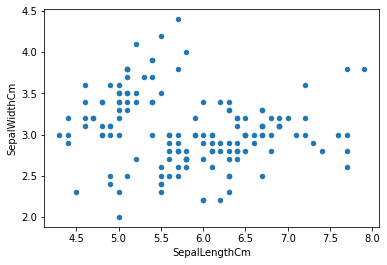

In [11]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm' )
plt.show()

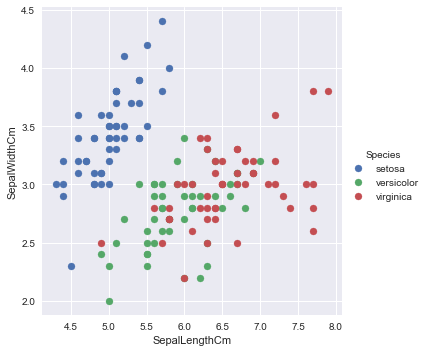

In [12]:
plt.style.use('seaborn')
sns.FacetGrid(iris,hue='Species',height=5).\
            map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
            .add_legend()

__Here, we can observe that we can differentiate Setosa flowers from other type of flowers.__ 

__Whereas, Versicolor and Vergina are overlapping with each other.__

__Pair Plot:__

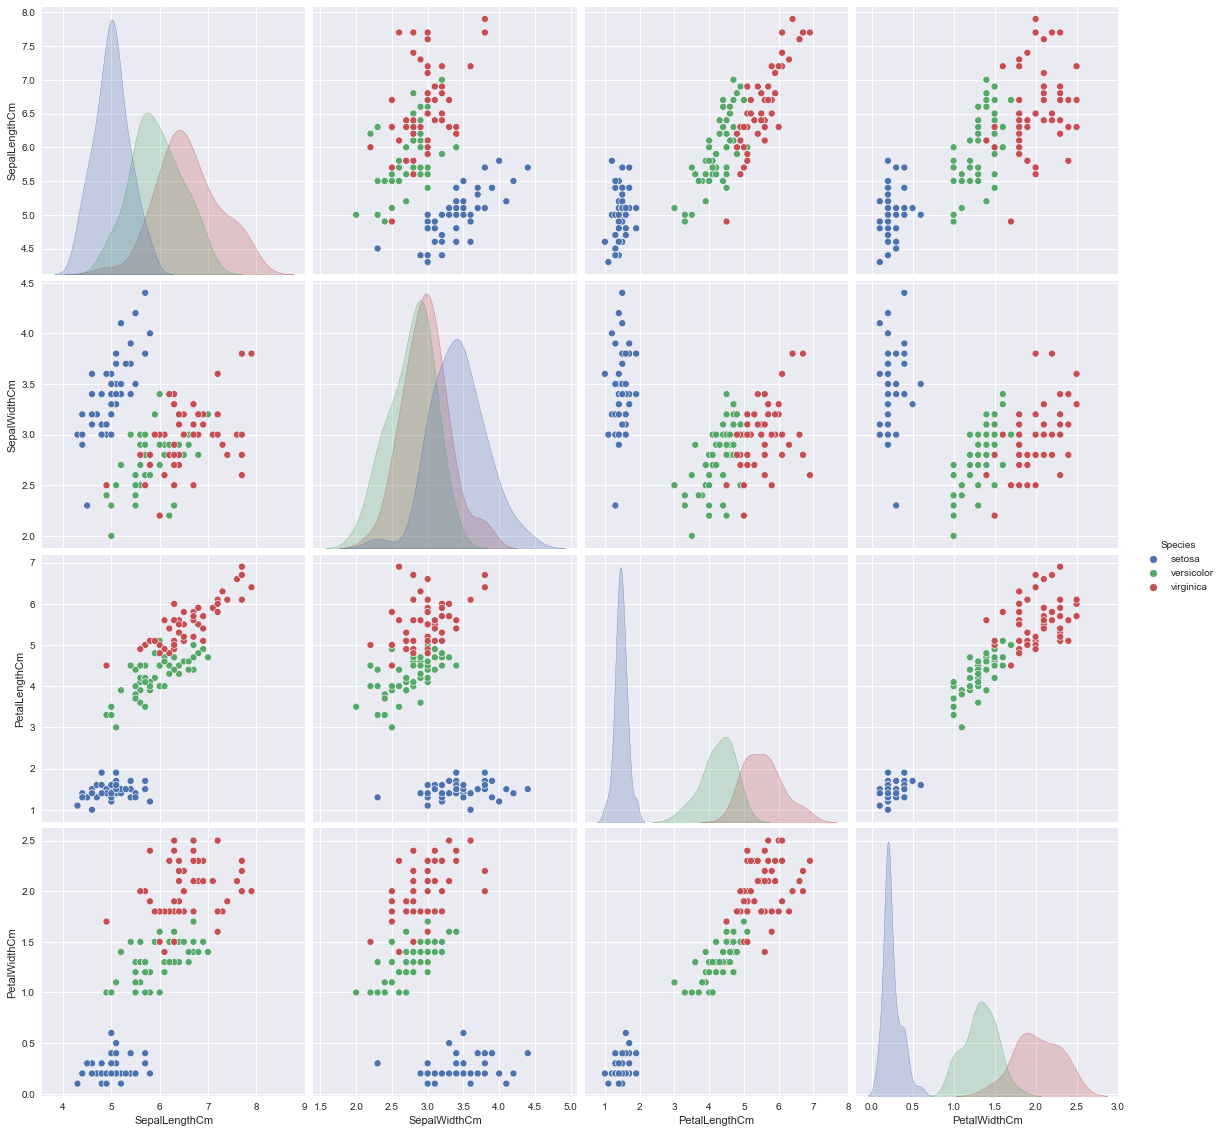

In [13]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=4)

__Box Plot:__

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

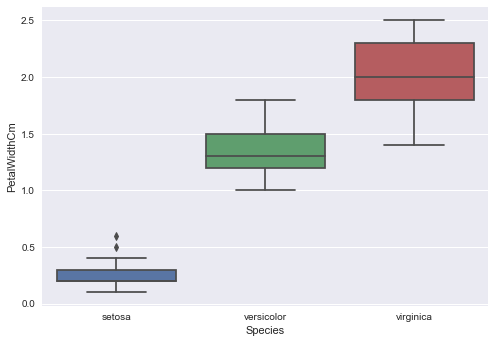

In [14]:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

__Violin Plot:__

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

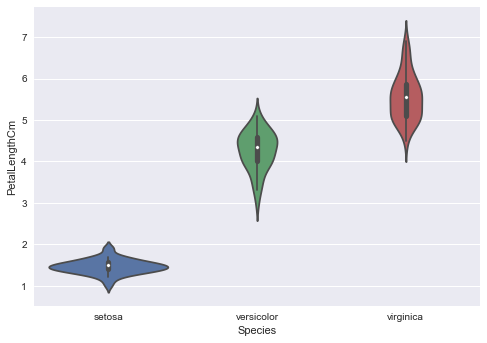

In [15]:
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)

__Heatmap:__

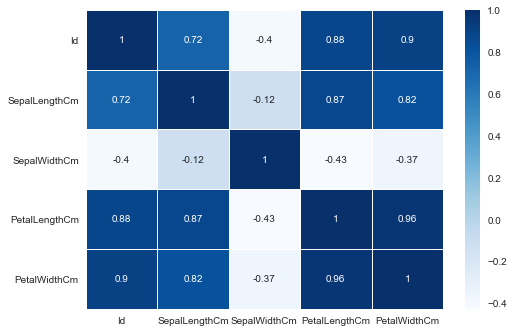

In [16]:
sns.heatmap(iris.corr(),cmap='Blues',annot=True,linewidths=1)
plt.show()

In [17]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=iris['Species']

__Training and Testing Data__

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


# Machine Learning Models

__Support Vector Machine__

In [20]:
from sklearn import svm
model=svm.SVC()
model.fit(X_train,y_train)

SVC()

In [21]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


__Decision Tree Classifier__

In [22]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=16)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=16)

In [23]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


__Random Forest Classifier__

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


__K Nearest Neighbors Classifier__

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


__Naive Bayes Classifier__

In [28]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [29]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 1.0


__Conclusion: We can observe here that Naive Bayes gives 100% accuracy.__